In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [60]:
df = pd.read_csv("nasdaq100.csv", sep=";")
df.head()

,Date,Starting (USD),Ending (USD)
0,01.01.24,16800,16500
1,01.12.23,15900,16100
2,01.11.23,15800,15300
3,01.10.23,16100,16200
4,01.09.23,16300,15700


In [3]:
df.isnull().sum()

Date              0
Starting (USD)    0
Ending (USD)      0
dtype: int64

In [5]:
df.drop('Date', axis=1) #for row, we use axis=1 and for column axis = 0

,Starting (USD),Ending (USD)
0,16800,16500
1,15900,16100
2,15800,15300
3,16100,16200
4,16300,15700
5,16800,16400
6,15900,16200
7,15800,15500
8,16150,16100
9,16300,15800


Text(0.5, 1.0, 'Nasdaq100 Stock Label')

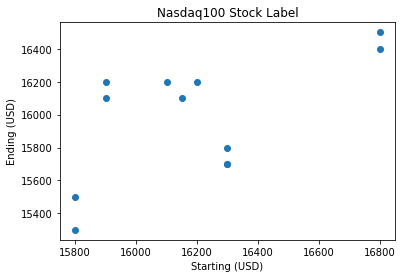

In [7]:
plt.scatter(df['Starting (USD)'] , df['Ending (USD)'])
plt.xlabel('Starting (USD)')
plt.ylabel('Ending (USD)')
plt.title('Nasdaq100 Stock Label')

In [11]:
x = df.drop('Ending (USD)', axis=1) 

In [18]:
x.head()

,Date,Starting (USD)
0,01.01.24,16800
1,01.12.23,15900
2,01.11.23,15800
3,01.10.23,16100
4,01.09.23,16300


In [24]:
y = df[['Ending (USD)']]
y.head()

,Ending (USD)
0,16500
1,16100
2,15300
3,16200
4,15700


# Linear Regression

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
reg = LinearRegression()

In [21]:
x.mean()

Starting (USD)    16195.833333
dtype: float64

In [25]:
y.mean()

Ending (USD)    15975.0
dtype: float64

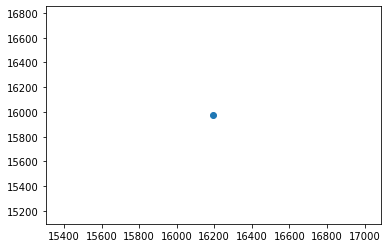

In [27]:
plt.scatter(x.mean(), y.mean()) #this dot indicates the path where the regression will pass through

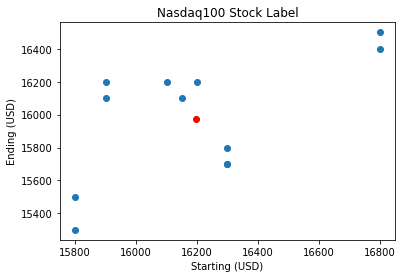

In [29]:
plt.scatter(df['Starting (USD)'] , df['Ending (USD)'])
plt.xlabel('Starting (USD)')
plt.ylabel('Ending (USD)')
plt.title('Nasdaq100 Stock Label')
plt.scatter(x.mean(), y.mean(), color='red')

# Here Red dot is the mean and all the blue dot indicates the actual values from where we got the mean.

In [34]:
print(x.dtypes)

Date              object
Starting (USD)     int64
dtype: object


In [37]:
x = df['Starting (USD)']
y = df['Ending (USD)']

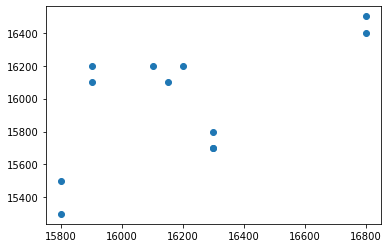

In [38]:
plt.scatter(x, y, label='Stock Data')

In [40]:
plt.show()

In [41]:
df.columns

Index(['Date', 'Starting (USD)', 'Ending (USD)'], dtype='object')

In [42]:
df[['Starting (USD)', 'Ending (USD)']].info()
df[['Starting (USD)', 'Ending (USD)']].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Starting (USD)  12 non-null     int64
 1   Ending (USD)    12 non-null     int64
dtypes: int64(2)
memory usage: 320.0 bytes


,Starting (USD),Ending (USD)
0,16800,16500
1,15900,16100
2,15800,15300
3,16100,16200
4,16300,15700


In [43]:
df = df.dropna(subset=['Starting (USD)', 'Ending (USD)'])
df['Starting (USD)'] = pd.to_numeric(df['Starting (USD)'], errors='coerce')
df['Ending (USD)'] = pd.to_numeric(df['Ending (USD)'], errors='coerce')

In [45]:
x = x.values.reshape(-1, 1)

In [46]:
y = y.values

In [47]:
reg.fit(x, y)

LinearRegression()

In [49]:
m = reg.coef_
c = reg.intercept_

In [50]:
m

array([0.65258293])

In [51]:
c

5405.875557022609

In [52]:
# y = mx + c

In [53]:
m*16700 + c

array([16304.0105628])

In [54]:
reg.predict([[16700]])

array([16304.0105628])

In [55]:
df['predicted_y'] = reg.predict(x)
df.head()

,Date,Starting (USD),Ending (USD),predicted_y
0,01.01.24,16800,16500,16369.268856
1,01.12.23,15900,16100,15781.944215
2,01.11.23,15800,15300,15716.685922
3,01.10.23,16100,16200,15912.460802
4,01.09.23,16300,15700,16042.977389


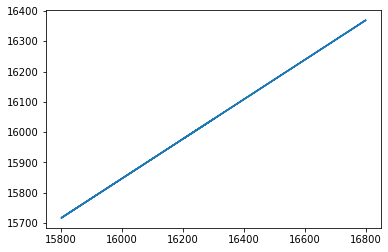

In [58]:
plt.plot(x, reg.predict(x))

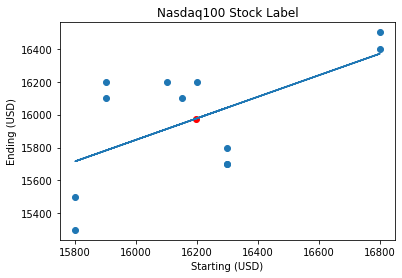

In [59]:
plt.scatter(df['Starting (USD)'] , df['Ending (USD)'])
plt.xlabel('Starting (USD)')
plt.ylabel('Ending (USD)')
plt.title('Nasdaq100 Stock Label')
plt.scatter(x.mean(), y.mean(), color='red')
plt.plot(x, reg.predict(x))